In [2]:
import pandas as pd
import numpy as np
import openpyxl as excel

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option('display.max_columns', None)


In [17]:
df = pd.read_excel("Data Sheet Energy.xlsx", skiprows=1)
print(df.head())


   House_id    Dwelling  Dwelling Grade  Household m2  Size Grade  Bedrooms  \
0         1  Appartment             0.0            36         0.0       1.0   
1         1  Appartment             0.0            36         0.0       1.0   
2         2  Appartment             0.0            95         0.4       2.0   
3         2  Appartment             0.0            95         0.4       2.0   
4         3  Appartment             0.0            80         0.2       2.0   

    Years   Old Heating Source  Area Code  Occupants  Children  Teenagers  \
0   0 - 5  0.00             No      11251          1         0          0   
1   0 - 5  0.00             No      11251          1         0          0   
2  6 - 15  0.33             No      14122          4         1          1   
3  6 - 15  0.33             No      14122          4         1          1   
4  6 - 15  0.33             No      17124          3         1          0   

   Adults  Elders  Ainc  Adec  Agauge  Fulltimers  Parttimers 

In [7]:
df.columns

Index(['House_id', 'Dwelling', 'Dwelling Grade', 'Household m2', 'Size Grade',
       'Bedrooms', 'Years', 'Old', 'Heating Source', 'Area Code', 'Occupants',
       'Children', 'Teenagers', 'Adults', 'Elders', 'Ainc', 'Adec', 'Agauge',
       'Fulltimers', 'Parttimers', 'Grads', 'PostGrads', 'Education Index',
       'Income', 'Recycling', 'Energy Class', 'Thermostats', 'Water Heater',
       'Smart Plugs', 'Awareness', 'Start', 'End', 'Days', 'Kwhs', 'Kwh/day',
       'Kwh/day/m2', 'HDD', 'CDD'],
      dtype='object')

In [47]:
df.isnull().sum()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [48]:
df.describe()

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Dwelling:
Dwelling
Appartment      131
Semidetached     33
Family House     16
Townhome          6
Name: count, dtype: int64

Value counts for Years:
Years
6 - 15     70
16 - 30    50
30+        36
0 - 5      30
Name: count, dtype: int64

Value counts for Heating Source:
Heating Source
No     132
Yes     54
Name: count, dtype: int64

Value counts for Income:
Income
20,001€ - 40,000€    70
10,001€ - 20,000€    63
0 - 10,000€          27
40,000€ - 60,000€    17
άνω των 60,0001€      9
Name: count, dtype: int64

Value counts for Recycling:
Recycling
Often or Always    116
Sometimes           45
Rarely              25
Name: count, dtype: int64

Value counts for Energy Class:
Energy Class
Often or Always    99
Sometimes          72
Rarely             15
Name: count, dtype: int64

Value counts for Thermostats:
Thermostats
Often or Always    147
Rarely              25
Sometimes           14
Name: count, dtype: int64

Value counts for Water Heater:
Water Heater
No     123
Yes

In [20]:
numeric_cols = ["Household m2", "Bedrooms", "Years", "Occupants", "Children", "Teenagers", "Adults"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print(df[numeric_cols].dtypes)


Household m2      int64
Bedrooms        float64
Years           float64
Occupants         int64
Children          int64
Teenagers         int64
Adults            int64
dtype: object


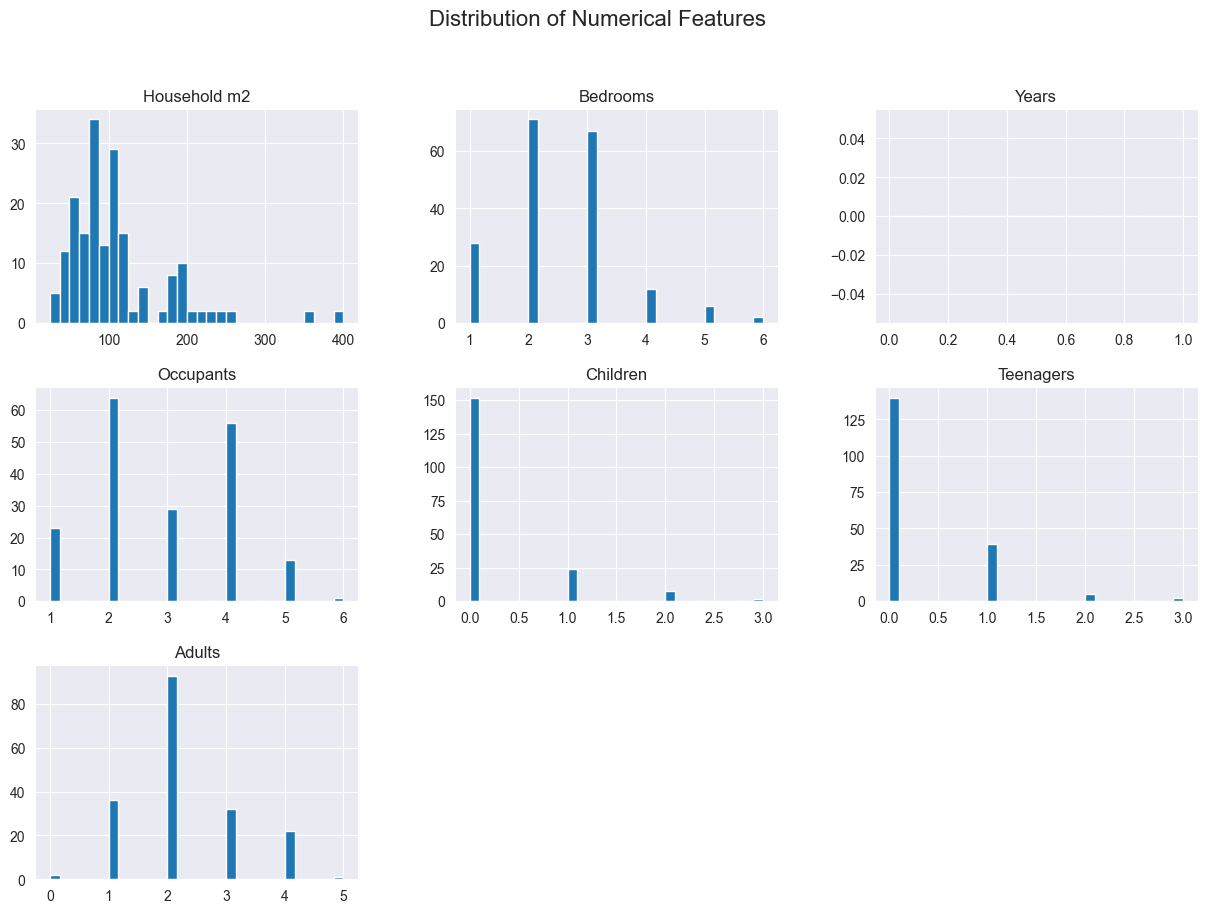

In [21]:
import matplotlib.pyplot as plt

df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Check numeric columns
print(numeric_df.columns)


Index(['House_id', 'Dwelling', 'Dwelling Grade', 'Household m2', 'Size Grade',
       'Bedrooms', 'Years', 'Old', 'Heating Source', 'Area Code', 'Occupants',
       'Children', 'Teenagers', 'Adults', 'Elders', 'Ainc', 'Adec', 'Agauge',
       'Fulltimers', 'Parttimers', 'Grads', 'PostGrads', 'Education Index',
       'Income', 'Recycling', 'Energy Class', 'Thermostats', 'Water Heater',
       'Smart Plugs', 'Awareness', 'Days', 'Kwhs', 'Kwh/day', 'Kwh/day/m2',
       'HDD', 'CDD'],
      dtype='object')


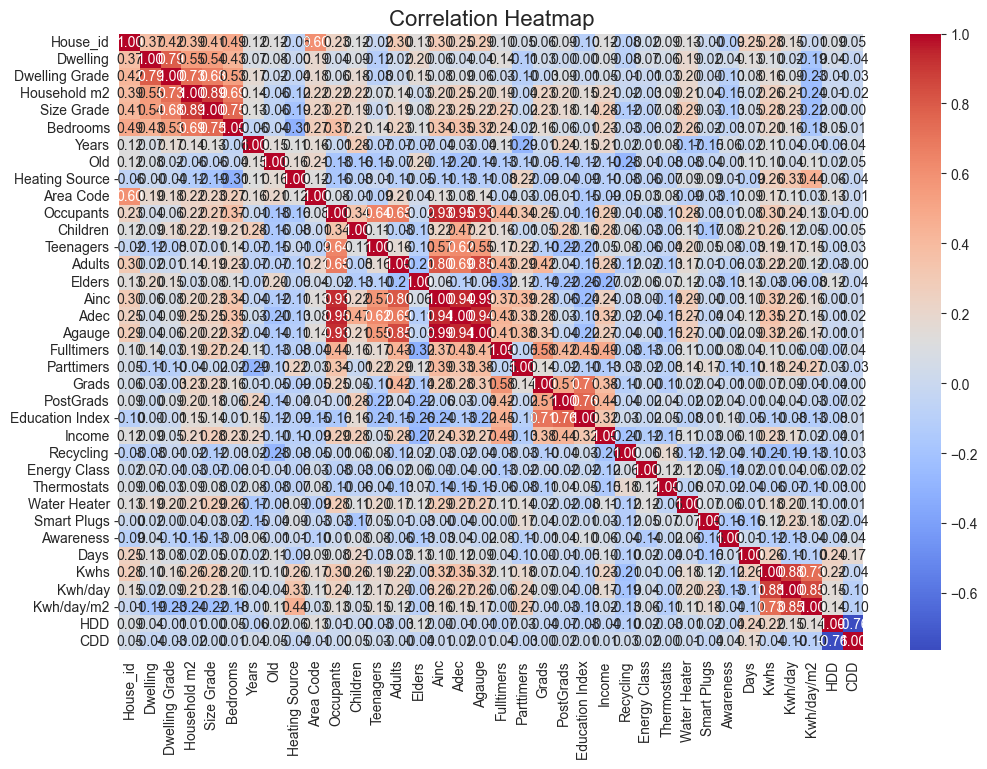

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Index(['House_id', 'Dwelling', 'Dwelling Grade', 'Household m2', 'Size Grade',
       'Bedrooms', 'Years', 'Old', 'Heating Source', 'Area Code', 'Occupants',
       'Children', 'Teenagers', 'Adults', 'Elders', 'Ainc', 'Adec', 'Agauge',
       'Fulltimers', 'Parttimers', 'Grads', 'PostGrads', 'Education Index',
       'Income', 'Recycling', 'Energy Class', 'Thermostats', 'Water Heater',
       'Smart Plugs', 'Awareness', 'Start', 'End', 'Days', 'Kwhs', 'Kwh/day',
       'Kwh/day/m2', 'HDD', 'CDD'],
      dtype='object')


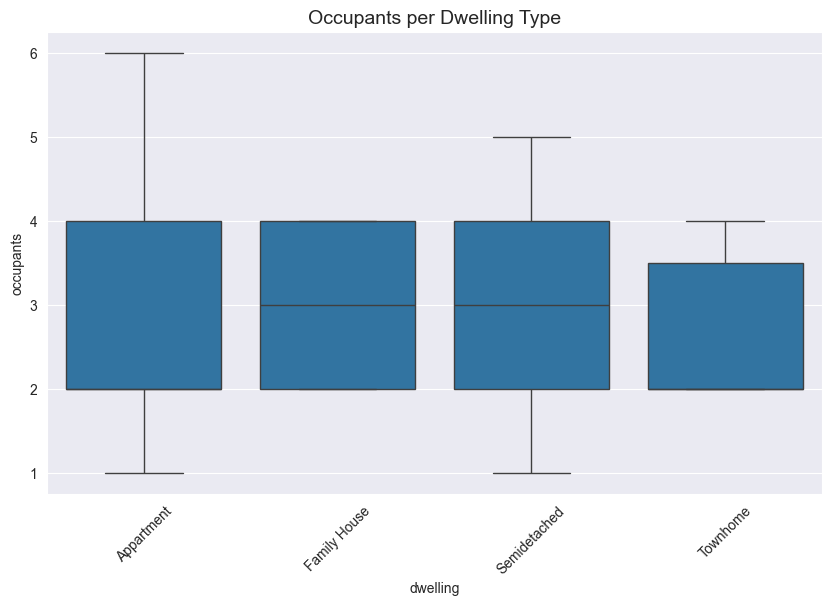

In [24]:
# Check exact column names
print(df.columns)

# Rename columns to lowercase for consistency
df.columns = df.columns.str.lower().str.strip()

# Convert occupants column to numeric
df['occupants'] = pd.to_numeric(df['occupants'], errors='coerce')

# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='dwelling', y='occupants', data=df)
plt.title("Occupants per Dwelling Type", fontsize=14)
plt.xticks(rotation=45)
plt.show()


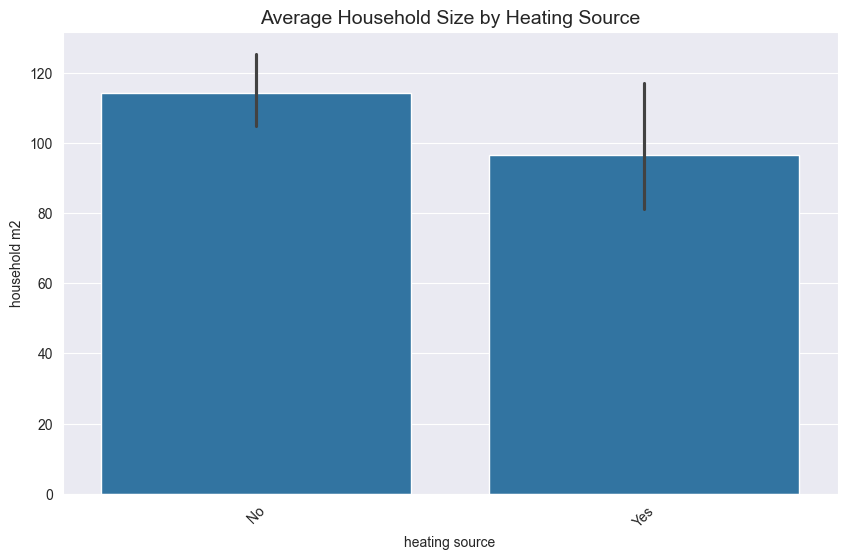

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='heating source', y='household m2', data=df)
plt.title("Average Household Size by Heating Source", fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [41]:
# Automatically select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric columns for pairplot:", num_cols)


Numeric columns for pairplot: Index(['house_id', 'dwelling grade', 'household m2', 'size grade', 'bedrooms',
       'years', 'old', 'area code', 'occupants', 'children', 'teenagers',
       'adults', 'elders', 'ainc', 'adec', 'agauge', 'fulltimers',
       'parttimers', 'grads', 'postgrads', 'education index', 'days', 'kwhs',
       'kwh/day', 'kwh/day/m2', 'hdd', 'cdd'],
      dtype='object')


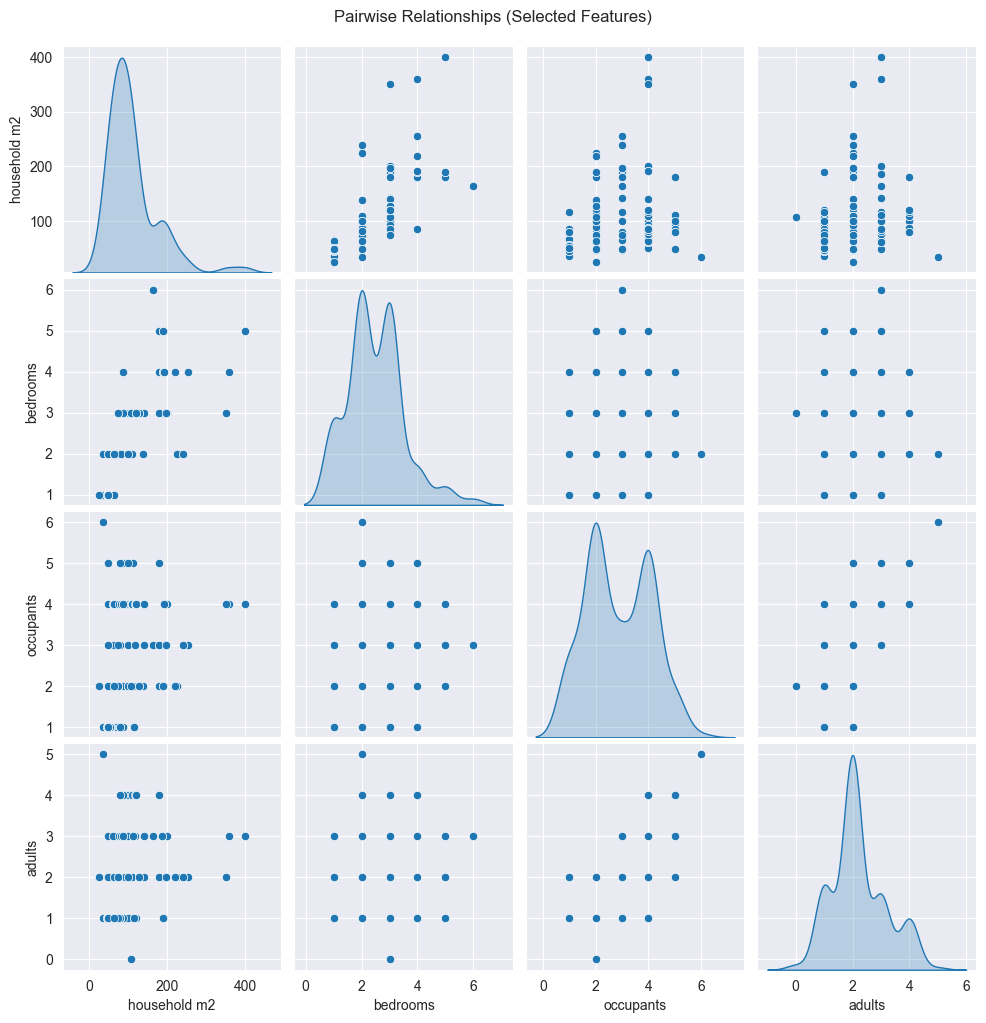

In [26]:
selected_cols = ['household m2', 'bedrooms', 'occupants', 'adults']  # choose 3–5 columns
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle("Pairwise Relationships (Selected Features)", y=1.02)
plt.show()


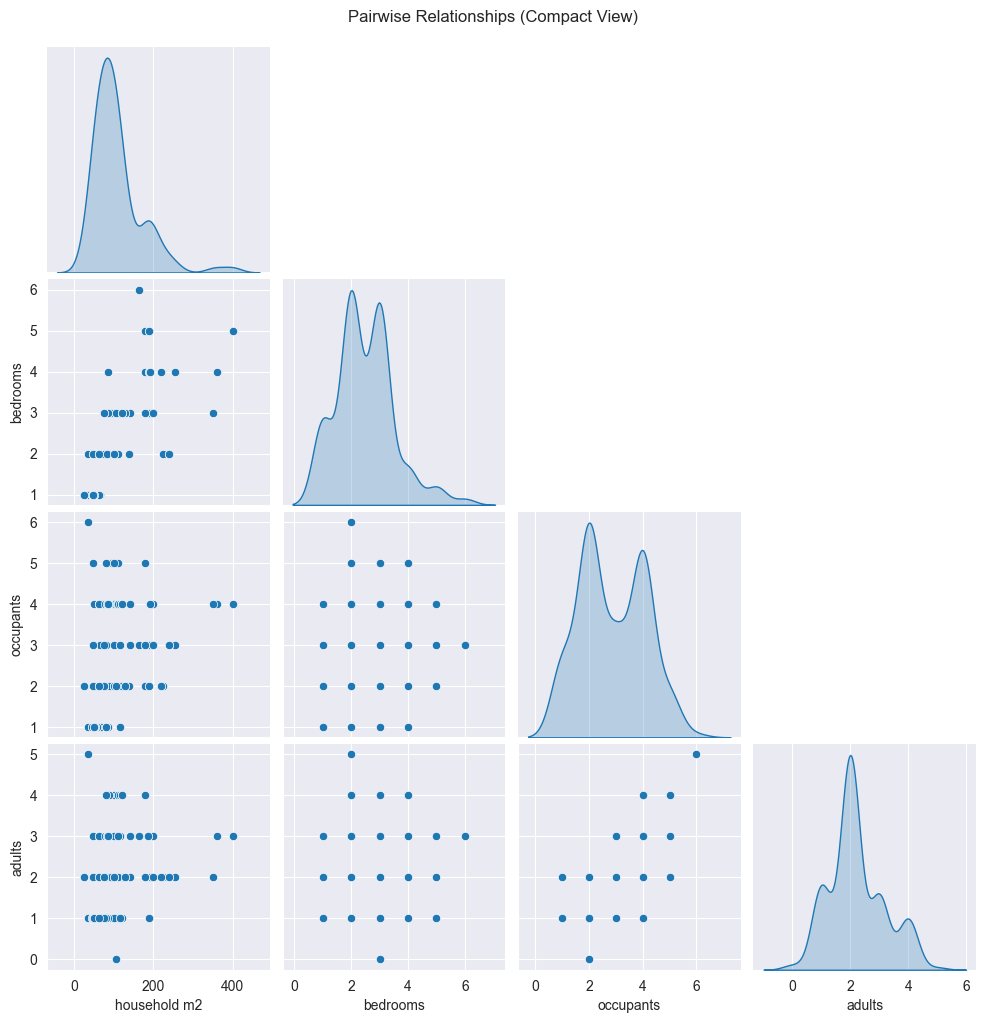

In [27]:
sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships (Compact View)", y=1.02)
plt.show()


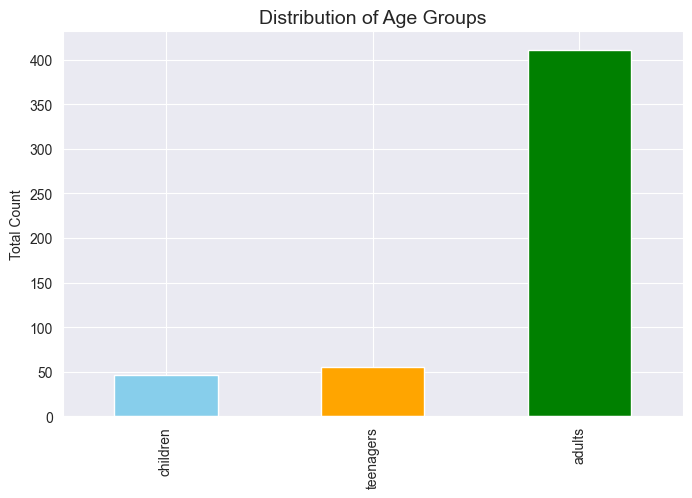

In [38]:
age_groups = ['children', 'teenagers', 'adults']
df[age_groups].sum().plot(kind='bar', figsize=(8,5), color=['skyblue','orange','green'])
plt.title("Distribution of Age Groups", fontsize=14)
plt.ylabel("Total Count")
plt.show()
